In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL

In [2]:
data_dir = "D:/User/Downloads/Classification/Classification"
Categories = [ "Healthy","Faulty"]


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/User/Downloads/Classification/Classification')

In [4]:
list(data_dir.glob('*/*.png'))[:5]

[WindowsPath('D:/User/Downloads/Classification/Classification/Faulty/0R007@6_10.png'),
 WindowsPath('D:/User/Downloads/Classification/Classification/Faulty/0R007@6_11.png'),
 WindowsPath('D:/User/Downloads/Classification/Classification/Faulty/0R007@6_110.png'),
 WindowsPath('D:/User/Downloads/Classification/Classification/Faulty/0R007@6_111.png'),
 WindowsPath('D:/User/Downloads/Classification/Classification/Faulty/0R007@6_112.png')]

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2508


In [6]:
Healthy = list(data_dir.glob('Healthy/*'))
Healthy[:5]
Faulty = list(data_dir.glob('Faulty/*'))

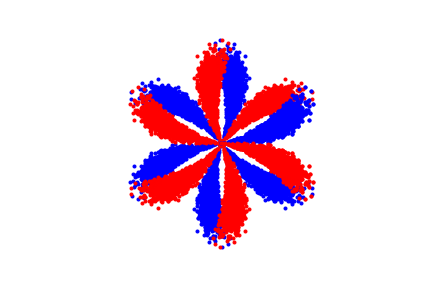

In [7]:
PIL.Image.open(str(Healthy[6]))

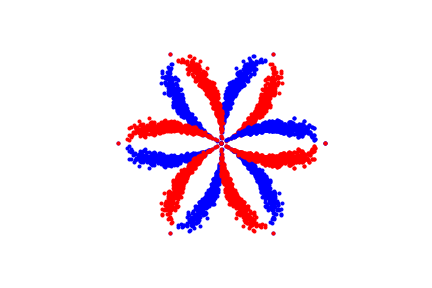

In [8]:
PIL.Image.open(str(Faulty[9]))

In [9]:
category_dict={"Healthy":0,"Faulty":1}
images_dict = {"Healthy" : Healthy,"Faulty" : Faulty}

In [10]:
img = cv2.imread(str(images_dict["Faulty"][1]))
img.shape

(288, 432, 3)

In [11]:
X, y = [], []

for category, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
#         resized_img = cv2.resize(img,(180,180))
        X.append(img)
        y.append(category_dict[category])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
len(X_train)

1881

In [15]:
from PIL import Image
img = Image.fromarray(X_train[0], 'RGB')
img.show()


In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)


ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
num_classes = 2
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(180,180,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1,activation="sigmoid")
])

In [25]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(X_train_scaled, y_train,steps_per_epoch=33,epochs=5, validation_data=(X_test_scaled, y_test))

Train on 1881 samples, validate on 627 samples
Epoch 1/5
1881/1881 [==============================] - 28s 15ms/sample - loss: 1.5483e-09 - accuracy: 1.0000 - val_loss: 4.6708e-10 - val_accuracy: 1.0000
Epoch 2/5
1881/1881 [==============================] - 28s 15ms/sample - loss: 1.5376e-09 - accuracy: 1.0000 - val_loss: 4.6306e-10 - val_accuracy: 1.0000
Epoch 3/5
1881/1881 [==============================] - 27s 15ms/sample - loss: 1.5188e-09 - accuracy: 1.0000 - val_loss: 4.5815e-10 - val_accuracy: 1.0000
Epoch 4/5
1881/1881 [==============================] - 28s 15ms/sample - loss: 1.5192e-09 - accuracy: 1.0000 - val_loss: 4.5677e-10 - val_accuracy: 1.0000
Epoch 5/5
1881/1881 [==============================] - 27s 14ms/sample - loss: 1.5134e-09 - accuracy: 1.0000 - val_loss: 4.5464e-10 - val_accuracy: 1.0000


In [31]:
model.evaluate(X_test_scaled,y_test)

627/627 [==============================] - 2s 4ms/sample - loss: 4.5463e-10 - accuracy: 1.0000


[4.5463496183217205e-10, 1.0]

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_8 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          multiple                 

In [32]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(180,180))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("F",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("H",fontsize=30)

ERROR! Session/line number was not unique in database. History logging moved to new session 75
[[1.]]


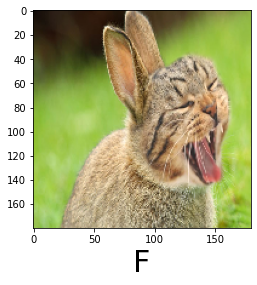

In [35]:
from tensorflow.keras.preprocessing import image


[[0.]]


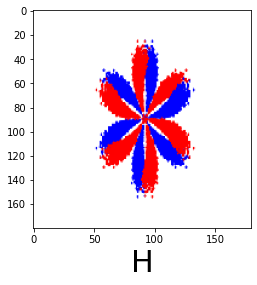

In [41]:
predictImage(r"D:/User/Downloads/Classification/Classification/Healthy/Normal_0_110.png ")